In [1]:
#Install required packages
!pip install plotly
!pip install dash_core_components
!pip install dash
!pip install folium
!pip install cufflinks
!pip install seaborn
!pip install unzip
!pip install statsmodels
!pip install selenium

In [2]:
#Import relevant libraries
import unzip
from zipfile import ZipFile
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import cufflinks as cf
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from dash import dcc
import plotly.express as px
import plotly.subplots as sp
from statsmodels.tsa.arima.model import ARIMA
import math

%matplotlib inline
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

2022-12-12 03:59:05.995841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 03:59:06.093452: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-12 03:59:06.097354: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-12 03:59:06.097369: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

## Data Concatenation and Data Cleaning

In [3]:
path = "."
files = os.listdir(path)

In [4]:
directory = !pwd
directory = directory[0]

In [5]:
#Getting the data from current directory to the notebook. 
list_2019 = sorted(glob.glob(os.path.join(directory,'2019*-bluebikes*.csv')))
list_2020 = sorted(glob.glob(os.path.join(directory,'2020*-bluebikes*.csv')))
list_2021 = sorted(glob.glob(os.path.join(directory,'2021*-bluebikes*.csv')))
list_2022 = sorted(glob.glob(os.path.join(directory,'2022*-bluebikes*.csv')))

In [6]:
list_2020

['/root/snap/idmp/202001-bluebikes-tripdata.csv',
 '/root/snap/idmp/202002-bluebikes-tripdata.csv',
 '/root/snap/idmp/202003-bluebikes-tripdata.csv',
 '/root/snap/idmp/202004-bluebikes-tripdata.csv',
 '/root/snap/idmp/202005-bluebikes-tripdata.csv',
 '/root/snap/idmp/202006-bluebikes-tripdata.csv',
 '/root/snap/idmp/202007-bluebikes-tripdata.csv',
 '/root/snap/idmp/202008-bluebikes-tripdata.csv',
 '/root/snap/idmp/202009-bluebikes-tripdata.csv',
 '/root/snap/idmp/202010-bluebikes-tripdata.csv',
 '/root/snap/idmp/202011-bluebikes-tripdata.csv',
 '/root/snap/idmp/202012-bluebikes-tripdata.csv']

In [7]:
df_2019 = pd.DataFrame()
df_2020 = pd.DataFrame()
df_2021 = pd.DataFrame()
df_2022 = pd.DataFrame()

In [8]:
temp_list_2019 = []
for file in list_2019:
    df = pd.read_csv(file)
    temp_list_2019.append(df)

In [9]:
df_2019 = pd.concat(temp_list_2019)  #concatinating all the 2019 montly data

In [10]:
temp_list_2020 = []
for file in list_2020:
    df = pd.read_csv(file)
    temp_list_2020.append(df)

In [11]:
df_2020 = pd.concat(temp_list_2020)  #concatinating all the 2020 montly data

In [12]:
temp_list_2021 = []
for file in list_2021:
    df = pd.read_csv(file)
    temp_list_2021.append(df)
df_2021 = pd.concat(temp_list_2021) #concatinating all the 2021 montly data
    

In [13]:
temp_list_2022 = []

for file in list_2022:
    df = pd.read_csv(file)
    temp_list_2022.append(df)
df_2022 = pd.concat(temp_list_2022) #concatinating all the 2022 montly data
    

In [14]:
print("Size of 2019 data-frame {} x {}".format(df_2019.shape[0], df_2019.shape[1]))
print("Size of 2020 data-frame {} x {}".format(df_2020.shape[0], df_2020.shape[1]))
print("Size of 2021 data-frame {} x {}".format(df_2021.shape[0], df_2021.shape[1]))
print("Size of 2022 data-frame {} x {}".format(df_2022.shape[0], df_2022.shape[1]))

Size of 2019 data-frame 2522771 x 15
Size of 2020 data-frame 2073448 x 16
Size of 2021 data-frame 2934378 x 14
Size of 2022 data-frame 3614369 x 14


In [15]:
df_2019.isna().sum()   #Checking for NA values

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [16]:
df_2020.isna().sum()

tripduration                     0
starttime                        0
stoptime                         0
start station id                 0
start station name               0
start station latitude           0
start station longitude          0
end station id                   0
end station name                 0
end station latitude             0
end station longitude            0
bikeid                           0
usertype                         0
birth year                 1657472
gender                     1657472
postal code                 560202
dtype: int64

In [17]:
df_2021.isna().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
postal code                222076
dtype: int64

In [18]:
df_2022.isna().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
postal code                456687
dtype: int64

In [19]:
#dropping birthyear and gender from df_2019
df_2019.drop(["birth year", "gender"], axis = 1, inplace = True)


In [20]:
#dropping birthyear, gender and postal code from df_2020 
df_2020.drop(["birth year", "gender", "postal code"], axis = 1, inplace = True)

In [21]:
#dropping postal code from df_2021 and df_2022
df_2021.drop(["postal code"], axis = 1, inplace = True)
df_2022.drop(["postal code"], axis = 1, inplace = True)

In [22]:
print("After dropping un necessary columns")
print("Size of 2019 data-frame {} x {}".format(df_2019.shape[0], df_2019.shape[1]))
print("Size of 2020 data-frame {} x {}".format(df_2020.shape[0], df_2020.shape[1]))
print("Size of 2021 data-frame {} x {}".format(df_2021.shape[0], df_2021.shape[1]))
print("Size of 2022 data-frame {} x {}".format(df_2022.shape[0], df_2022.shape[1]))

After dropping un necessary columns
Size of 2019 data-frame 2522771 x 13
Size of 2020 data-frame 2073448 x 13
Size of 2021 data-frame 2934378 x 13
Size of 2022 data-frame 3614369 x 13


In [23]:
 df = pd.concat([df_2019,df_2020,df_2021,df_2022]) #concating all the yearly data to create a single dataframe

In [24]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype
0,371,2019-01-01 00:09:13.7980,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber
1,264,2019-01-01 00:33:56.1820,2019-01-01 00:38:20.8800,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber
2,458,2019-01-01 00:41:54.6000,2019-01-01 00:49:33.2730,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber
3,364,2019-01-01 00:43:32.5710,2019-01-01 00:49:37.4260,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,2969,Subscriber
4,681,2019-01-01 00:49:56.4640,2019-01-01 01:01:17.7010,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,3469,Subscriber


In [25]:
#extracting year, month, day, hour and day of week from the starttime timestamp
df['starttime'] = pd.to_datetime(df['starttime'])
df['month'] = df['starttime'].dt.month
df['day'] = df['starttime'].dt.day
df['year'] = df['starttime'].dt.year
df['hour'] = df['starttime'].dt.hour
df["weekday"] = df['starttime'].dt.dayofweek

In [26]:
#Mapping weekday and weekend to 0 and 1
def isweekday(weekday):
    if weekday == 0 or weekday == 6:
        return 0
    else:
        return 1

In [27]:
df['is_week_day'] = df["weekday"].apply(isweekday)

In [28]:
#creating a new column season using the month column
def season(mon):  
    if mon>=3 and mon<=5:
        return "Spring"
    elif mon>=6 and mon<=8:
        return "Summer"
    elif mon>=9 and mon<=11:
        return "Fall"
    else:
        return "Winter"

In [29]:
df['season'] = df['month'].apply(season)

In [30]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'month', 'day', 'year', 'hour', 'weekday', 'is_week_day', 'season'],
      dtype='object')

In [31]:
df["season"].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [32]:
df['year'] = df['year'].apply(str)

In [33]:
df_weekday = df[df["is_week_day"] == 1]

In [34]:
df_weekday.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,month,day,year,hour,weekday,is_week_day,season
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1,1,2019,0,1,1,Winter
1,264,2019-01-01 00:33:56.182,2019-01-01 00:38:20.8800,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1,1,2019,0,1,1,Winter


In [35]:
df_weekend = df[df["is_week_day"] == 0]

In [36]:
df_weekend["is_week_day"].unique()

array([0])

In [37]:
df_weekend.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,month,day,year,hour,weekday,is_week_day,season
11125,377,2019-01-06 00:00:21.328,2019-01-06 00:06:39.1980,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.366981,-71.076472,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,2192,Subscriber,1,6,2019,0,6,0,Winter
11126,858,2019-01-06 00:01:04.850,2019-01-06 00:15:23.6420,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,176,Lesley University,42.386748,-71.119019,3151,Subscriber,1,6,2019,0,6,0,Winter


## Exploratory Data Analysis

In [38]:
rentals_per_hour = pd.value_counts(df['hour'])

In [39]:
rph_df = rentals_per_hour.to_frame()
rph_df.reset_index(inplace=True)
rph_df.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)

In [40]:
df_grouped = df.groupby("year")

In [41]:
rentals_per_hour_2019 = pd.value_counts(df_grouped.get_group("2019")["hour"])
rph_df_2019 = rentals_per_hour_2019.to_frame()
rph_df_2019.reset_index(inplace=True)
rph_df_2019.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)


rentals_per_hour_2020 = pd.value_counts(df_grouped.get_group("2020")["hour"])
rph_df_2020 = rentals_per_hour_2020.to_frame()
rph_df_2020.reset_index(inplace=True)
rph_df_2020.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)

rentals_per_hour_2021 = pd.value_counts(df_grouped.get_group("2021")["hour"])
rph_df_2021 = rentals_per_hour_2021.to_frame()
rph_df_2021.reset_index(inplace=True)
rph_df_2021.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)

rentals_per_hour_2022 = pd.value_counts(df_grouped.get_group("2022")["hour"])
rph_df_2022 = rentals_per_hour_2022.to_frame()
rph_df_2022.reset_index(inplace=True)
rph_df_2022.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)


In [42]:
init_notebook_mode(connected=True) #importing plotly cufflinks for visualization 
cf.go_offline()

In [43]:
rph_df.sort_values(by=['time'], inplace = True)

In [44]:
rentals_per_hour_weekday = pd.value_counts(df_weekday['hour'])
rph_df_weekday = rentals_per_hour_weekday.to_frame()
rph_df_weekday.reset_index(inplace=True)
rph_df_weekday.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)
rph_df_weekday.sort_values(by=['time'], inplace = True)

In [45]:
rentals_per_hour_weekend = pd.value_counts(df_weekend['hour'])
rph_df_weekend = rentals_per_hour_weekend.to_frame()
rph_df_weekend.reset_index(inplace=True)
rph_df_weekend.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)
rph_df_weekend.sort_values(by=['time'], inplace = True)

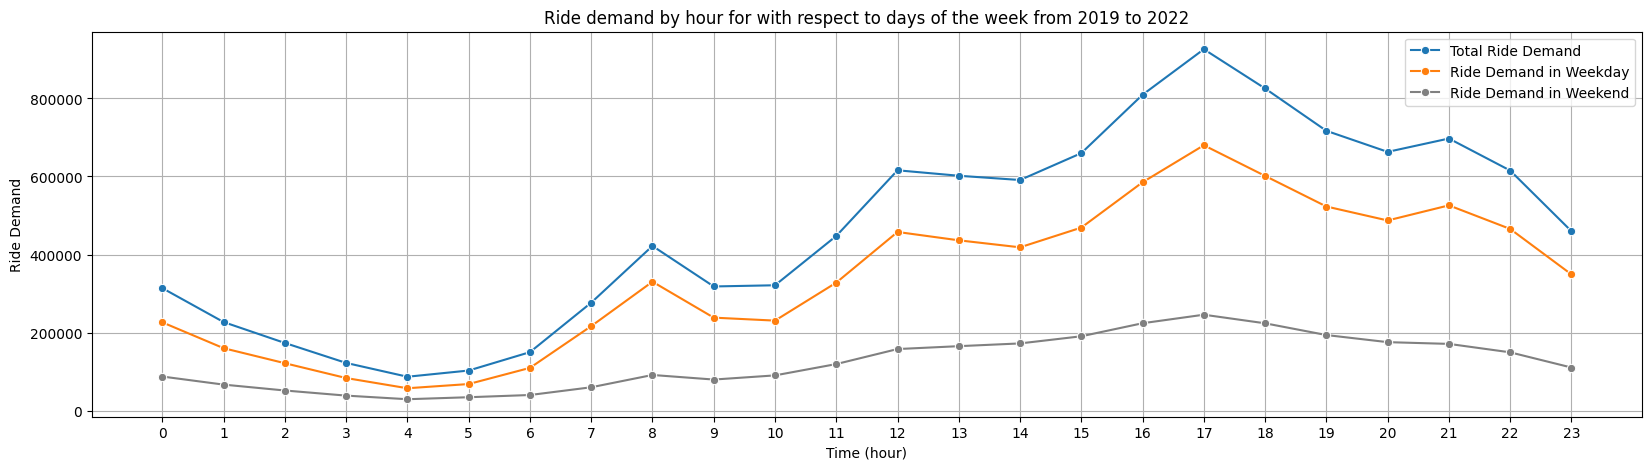

In [46]:
plt.figure(figsize=(20,5))
sns.lineplot(x = "time", y = "rides", data=rph_df, label = "Total Ride Demand", marker = "o")
sns.lineplot(x = "time", y = "rides", data = rph_df_weekday, label = "Ride Demand in Weekday", marker = "o")
sns.lineplot(x = "time", y = "rides", data = rph_df_weekend, label = "Ride Demand in Weekend", marker = "o", color = "grey")
plt.xlabel("Time (hour)")
plt.ylabel("Ride Demand")
plt.xticks(rph_df["time"])
plt.title("Ride demand by hour for with respect to days of the week from 2019 to 2022")
plt.grid()
plt.show()

In [47]:
rph_df_2019.sort_values(by=['time'], inplace = True)
rph_df_2020.sort_values(by=['time'], inplace = True)
rph_df_2021.sort_values(by=['time'], inplace = True)
rph_df_2022.sort_values(by=['time'], inplace = True)

In [48]:

# rph_df_temp = rentals_per_hour.to_frame()
# rph
# rph_df_temp.reset_index(inplace=True)
# rph_df_temp.rename(columns = {'index' : 'time', 'hour' : 'rides', 'year': 'year'},inplace=True)
rentals_2019 = rentals_per_hour_2019.to_frame()
rentals_2019["year"] = "2019"
rentals_2019.reset_index(inplace=True)
rentals_2019.rename(columns = {'index' : 'time', 'hour' : 'rides', "year": "year"},inplace=True)
rentals_2019.sort_values(by=['time'], inplace = True)


rentals_2020 = rentals_per_hour_2020.to_frame()
rentals_2020["year"] = "2020"
rentals_2020.reset_index(inplace=True)
rentals_2020.rename(columns = {'index' : 'time', 'hour' : 'rides', "year": "year"},inplace=True)
rentals_2020.sort_values(by=['time'], inplace = True)

rentals_2021 = rentals_per_hour_2021.to_frame()
rentals_2021["year"] = "2021"
rentals_2021.reset_index(inplace=True)
rentals_2021.rename(columns = {'index' : 'time', 'hour' : 'rides', "year": "year"},inplace=True)
rentals_2021.sort_values(by=['time'], inplace = True)

rentals_2022 = rentals_per_hour_2022.to_frame()
rentals_2022["year"] = "2022"
rentals_2022.reset_index(inplace=True)
rentals_2022.rename(columns = {'index' : 'time', 'hour' : 'rides', "year": "year"},inplace=True)
rentals_2022.sort_values(by=['time'], inplace = True)

In [49]:
rentals_per_hour_concat = pd.concat([rentals_2019, rentals_2020, rentals_2021, rentals_2022])

In [50]:
fig = px.line(rentals_per_hour_concat, y = "rides", x = "time", 
              title = "Demand of Blue Bikes by time of the day faceted by each year", color = "year", 
              facet_row = "year", labels = dict(rides = "Ride Demand", time = "Time"), facet_row_spacing = 0.03,
              height = 1000 ,markers = True)
fig.update_xaxes(dtick = "time")
fig.add_vrect(x0 = 5, x1 = 10, fillcolor = "LightSalmon", opacity = 0.5, layer = "below", line_width = 0)
fig.add_vrect(x0 = 15, x1 = 20, fillcolor = "LightSalmon", opacity = 0.5, layer = "below", line_width = 0)
fig.add_vrect(x0 = 10, x1 = 15, fillcolor = "Yellow", opacity = 0.35, layer = "below", line_width = 0)
fig.add_vrect(x0 = 20, x1 = 24, layer = "below", line_width = 0)
fig.add_vrect(x0 = -1, x1 = 5, layer = "below", line_width = 0)

In [51]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'month', 'day', 'year', 'hour', 'weekday', 'is_week_day', 'season'],
      dtype='object')

In [52]:
average_trip_by_membership_summary = df[["tripduration", "year", "usertype"]]

In [53]:
len_average_trip_by_membership_summary = average_trip_by_membership_summary["tripduration"].shape[0]

In [54]:
grouped_average_trip_by_membership_summary = average_trip_by_membership_summary.groupby(["usertype", "year"]).agg(
    avg_trip_duration = ("tripduration",np.mean))

In [55]:
average_trip_by_membership_summary = grouped_average_trip_by_membership_summary.groupby(["year", "usertype"]).mean().unstack

In [56]:
grouped_average_trip_by_membership_summary.groupby(["year", "usertype"]).mean().unstack().iplot(kind = 'bar',
                                                                                                y = 'avg_trip_duration', 
                                                                                                title="Average Duration for each year with respect to different users",
                                                                                                xTitle='Year', yTitle='Average Duration',
                                                                                               opacity = 1.0)
#plt.grid()
plt.show()

In [57]:
grouped_average_trip_by_membership_summary = df

In [58]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,month,day,year,hour,weekday,is_week_day,season
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1,1,2019,0,1,1,Winter
1,264,2019-01-01 00:33:56.182,2019-01-01 00:38:20.8800,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1,1,2019,0,1,1,Winter
2,458,2019-01-01 00:41:54.600,2019-01-01 00:49:33.2730,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1,1,2019,0,1,1,Winter
3,364,2019-01-01 00:43:32.571,2019-01-01 00:49:37.4260,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,2969,Subscriber,1,1,2019,0,1,1,Winter
4,681,2019-01-01 00:49:56.464,2019-01-01 01:01:17.7010,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,3469,Subscriber,1,1,2019,0,1,1,Winter


In [59]:
#grouping the data by latitude,longitude and name of the start station.
df_map=df.groupby(["start station latitude","start station longitude","start station name"]).size().reset_index(name='counts')

In [60]:
df_map.head()

,start station latitude,start station longitude,start station name,counts
0,0.000000,0.000000,MTL-ECO4-01,1
1,0.000000,0.000000,MTL-ECO5.1-01,1
2,0.000000,0.000000,Mobile Temporary Station 2,3
3,42.167226,-70.905558,BCBS Hingham,428
4,42.255600,-71.124440,Cleary Sq,206


In [61]:
rentals_per_season = pd.value_counts(df['season'])
rps_df = rentals_per_season.to_frame()
rps_df.reset_index(inplace=True)
rps_df.rename(columns = {'index' : 'season', 'season' : 'rides'}, inplace=True)

rentals_per_season_2019 = pd.value_counts(df_grouped.get_group("2019")["season"])
rps_df_2019 = rentals_per_season_2019.to_frame()
rps_df_2019.reset_index(inplace=True)
rps_df_2019.rename(columns = {'index' : 'season', 'season' : 'rides'}, inplace=True)


rentals_per_season_2020 = pd.value_counts(df_grouped.get_group("2020")["season"])
rps_df_2020 = rentals_per_season_2020.to_frame()
rps_df_2020.reset_index(inplace=True)
rps_df_2020.rename(columns = {'index' : 'season', 'season' : 'rides'}, inplace=True)


rentals_per_season_2021 = pd.value_counts(df_grouped.get_group("2021")["season"])
rps_df_2021 = rentals_per_season_2021.to_frame()
rps_df_2021.reset_index(inplace=True)
rps_df_2021.rename(columns = {'index' : 'season', 'season' : 'rides'}, inplace=True)


rentals_per_season_2022 = pd.value_counts(df_grouped.get_group("2022")["season"])
rps_df_2022 = rentals_per_season_2022.to_frame()
rps_df_2022.reset_index(inplace=True)
rps_df_2022.rename(columns = {'index' : 'season', 'season' : 'rides'}, inplace=True)

rps_test_df_headers = ['Summer','Fall','Spring','Winter']
rps_test_df = pd.DataFrame([rps_df_2019['rides']])
rps_test_df = rps_test_df.reset_index(drop=True)
rps_test_df

rps_test_df.columns = rps_test_df_headers
rps_test_df.loc[len(rps_test_df)] = list(rps_df_2020['rides'])
rps_test_df.loc[len(rps_test_df)] = list(rps_df_2021['rides'])
rps_test_df.loc[len(rps_test_df)] = list(rps_df_2022['rides'])

rps_test_df['year'] = ['2019','2020','2021','2022']
rps_test_df.iplot(kind='bar',x='year',color=['lemonchiffon','peachpuff','orange','lightblue'],barmode='stack',
                  title='Change in Demand for Blue Bikes with respect to season')
# fig = px.bar(rps_test_df,color=['Summer','Fall','Spring','Winter'],barmode='stack')
# fig.show()

In [62]:
rentals_per_season

Fall      3968432
Summer    3954259
Spring    2176269
Winter    1046006
Name: season, dtype: int64

In [63]:
m_1 = folium.Map(location=[42.3398, -71.089], tiles='openstreetmap', zoom_start=10.5)

# Add points to the map
loc = 'Blue Bikes Station in Boston'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
m_1.get_root().html.add_child(folium.Element(title_html))
mc = MarkerCluster()
for idx, row in df_map.iterrows():
    mc.add_child(Marker([row['start station latitude'], row['start station longitude']],tooltip=row['start station name']))
m_1.add_child(mc)

# Display the map
m_1

In [64]:
df_top = df_map.sort_values('counts',ascending=False)[:50] #creating a dataframe for top 50 popular stations

In [65]:
m_1 = folium.Map(location=[42.3398, -71.089], zoom_start=13,tiles='openstreetmap')
#tiles="CartoDB dark_matter"
# Add points to the map
loc = 'Top 10 Blue Bikes Station in Boston'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
m_1.get_root().html.add_child(folium.Element(title_html))
for idx, row in df_top.iterrows():
    folium.Circle(location=[row['start station latitude'], row['start station longitude']],radius=(row['counts'])/1000,
                  fill=True,fill_color = 'crimson',tooltip=(row['start station name'],row['counts'])).add_to(m_1)
    #folium.Marker(location=[row['start station latitude'], row['start station longitude']]).add_to(m_1)

# Display the map
m_1

In [66]:
#Subsetting the dataset to get the stations around Northeastern University
neu_stations = ['Ruggles T Stop - Columbus Ave at Melnea Cass Blvd','Forsyth St at Huntington Ave','Mass Ave T Station',
               'Tremont St at Northampton St']
df_map_neu = df_map.loc[df_map['start station name'].isin(neu_stations)]

In [67]:
df_map_neu

,start station latitude,start station longitude,start station name,counts
138,42.336244,-71.087986,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,80415
149,42.338432,-71.081690,Tremont St at Northampton St,9216
152,42.338896,-71.081500,Tremont St at Northampton St,30468
155,42.339202,-71.090511,Forsyth St at Huntington Ave,34934
169,42.341356,-71.083370,Mass Ave T Station,38946


In [68]:
m_1 = folium.Map(location=[42.3398, -71.089], tiles='openstreetmap', zoom_start=15)

# Add points to the map
loc = 'Blue Bikes Stations Around Northeastern University'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
m_1.get_root().html.add_child(folium.Element(title_html))
for idx, row in df_map_neu.iterrows():
     Marker([row['start station latitude'], row['start station longitude']],tooltip=row['start station name']).add_to(m_1)


# Display the map
m_1

In [69]:
df_neu_stations = df.loc[df['start station name'].isin(neu_stations)]

In [70]:
df_neu_stations.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,month,day,year,hour,weekday,is_week_day,season
79,1952,2019-01-01 08:50:43.987,2019-01-01 09:23:16.1110,364,Tremont St at Northampton St,42.338896,-71.081500,69,Coolidge Corner - Beacon St at Centre St,42.341598,-71.123338,3001,Subscriber,1,1,2019,8,1,1,Winter
184,1549,2019-01-01 10:49:33.679,2019-01-01 11:15:22.9710,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,51,Washington St at Lenox St,42.335099,-71.079038,2647,Subscriber,1,1,2019,10,1,1,Winter
237,675,2019-01-01 11:16:39.885,2019-01-01 11:27:55.5850,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,25,South End Library - Tremont St at W Newton St,42.341332,-71.076847,3924,Subscriber,1,1,2019,11,1,1,Winter
239,573,2019-01-01 11:17:00.348,2019-01-01 11:26:33.6040,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,25,South End Library - Tremont St at W Newton St,42.341332,-71.076847,4528,Subscriber,1,1,2019,11,1,1,Winter
421,218,2019-01-01 12:55:01.777,2019-01-01 12:58:40.3810,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,200,Washington St at Melnea Cass Blvd,42.332817,-71.081198,3873,Subscriber,1,1,2019,12,1,1,Winter


In [71]:
df_neu=df_neu_stations.groupby(["start station latitude","start station longitude","start station name","end station latitude",
                   "end station longitude","end station name"]).size().reset_index(name='counts')

In [72]:
df_neu.head()

,start station latitude,start station longitude,start station name,end station latitude,end station longitude,end station name,counts
0,42.336244,-71.087986,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.255600,-71.124440,Cleary Sq,6
1,42.336244,-71.087986,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.256838,-71.122509,Hyde Park Library,1
2,42.336244,-71.087986,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.262867,-71.121631,Hyde Park Ave at Arlington St,1
3,42.336244,-71.087986,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.267902,-71.093641,Mattapan T Stop,5
4,42.336244,-71.087986,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.274621,-71.093726,Blue Hill Ave at Almont St,2


In [73]:
df_neu_top=df_neu.sort_values('counts',ascending=False)[:20]

In [74]:
df_neu_top.head()

,start station latitude,start station longitude,start station name,end station latitude,end station longitude,end station name,counts
90,42.336244,-71.087986,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.331184,-71.095171,Roxbury Crossing T Stop - Columbus Ave at Trem...,9220
111,42.336244,-71.087986,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,3764
73,42.336244,-71.087986,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.322931,-71.100141,Jackson Square T Stop,3213
153,42.336244,-71.087986,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.343666,-71.085824,Christian Science Plaza - Massachusetts Ave at...,2466
1192,42.339202,-71.090511,Forsyth St at Huntington Ave,42.333293,-71.101246,St. Alphonsus St at Tremont St,2192


In [75]:

map_plot_route = folium.Map(location=[42.3398, -71.089], zoom_start=13)
# Add points to the map
loc = 'Top 10 popular rides from Northeastern stations'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map_plot_route.get_root().html.add_child(folium.Element(title_html))
for idx, row in df_neu_top.iterrows():
    folium.CircleMarker([row['start station latitude'], row['start station longitude']],tooltip=row['start station name'],color='#ff0000',fill_color='#ff0000').add_to(map_plot_route)
    folium.CircleMarker([row['end station latitude'], row['end station longitude']],tooltip=row['end station name'],color='#000000',fill_color='#000000').add_to(map_plot_route)
    folium.PolyLine([(row['start station latitude'], row['start station longitude']),(row['end station latitude'], row['end station longitude'])]).add_to(map_plot_route)
map_plot_route



In [76]:
df_neu_2019 = df_2019.loc[df_2019['start station name'].isin(neu_stations)]
df_neu_2020 = df_2020.loc[df_2020['start station name'].isin(neu_stations)]
df_neu_2021 = df_2021.loc[df_2021['start station name'].isin(neu_stations)]
df_neu_2022 = df_2022.loc[df_2022['start station name'].isin(neu_stations)]

In [77]:
df_neu_2019=df_neu_2019.groupby(["start station latitude","start station longitude","start station name","end station latitude",
                   "end station longitude","end station name"]).size().reset_index(name='counts')
df_neu_2019_top=df_neu_2019.sort_values('counts',ascending=False)[:20]
df_neu_2020=df_neu_2020.groupby(["start station latitude","start station longitude","start station name","end station latitude",
                   "end station longitude","end station name"]).size().reset_index(name='counts')
df_neu_2020_top=df_neu_2020.sort_values('counts',ascending=False)[:20]
df_neu_2021 = df_neu_2021.groupby(["start station latitude","start station longitude","start station name","end station latitude",
                   "end station longitude","end station name"]).size().reset_index(name='counts')
df_neu_2021_top=df_neu_2021.sort_values('counts',ascending=False)[:20]
df_neu_2022 = df_neu_2022.groupby(["start station latitude","start station longitude","start station name","end station latitude",
                   "end station longitude","end station name"]).size().reset_index(name='counts')
df_neu_2022_top=df_neu_2022.sort_values('counts',ascending=False)[:20]

In [78]:
map_plot_route = folium.Map(location=[42.3398, -71.089], zoom_start=12)
loc = 'Top 10 popular rides from Northeastern stations in 2019'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map_plot_route.get_root().html.add_child(folium.Element(title_html))

# Add points to the map
for idx, row in df_neu_2019_top.iterrows():
    folium.CircleMarker([row['start station latitude'], row['start station longitude']],tooltip=row['start station name'],color='#ff0000',fill_color='#ff0000').add_to(map_plot_route)
    folium.CircleMarker([row['end station latitude'], row['end station longitude']],tooltip=row['end station name'],color='#000000',fill_color='#000000').add_to(map_plot_route)
    folium.PolyLine([(row['start station latitude'], row['start station longitude']),(row['end station latitude'], row['end station longitude'])]).add_to(map_plot_route) 
map_plot_route

In [79]:
map_plot_route = folium.Map(location=[42.3398, -71.089], zoom_start=13)
loc = 'Top 10 popular rides from Northeastern stations in 2020'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map_plot_route.get_root().html.add_child(folium.Element(title_html))
# Add points to the map
for idx, row in df_neu_2020_top.iterrows():
    folium.CircleMarker([row['start station latitude'], row['start station longitude']],tooltip=row['start station name'],color='#ff0000',fill_color='#ff0000').add_to(map_plot_route)
    folium.CircleMarker([row['end station latitude'], row['end station longitude']],tooltip=row['end station name'],color='#000000',fill_color='#000000').add_to(map_plot_route)
    folium.PolyLine([(row['start station latitude'], row['start station longitude']),(row['end station latitude'], row['end station longitude'])]).add_to(map_plot_route)
map_plot_route

In [80]:
map_plot_route = folium.Map(location=[42.3398, -71.089], zoom_start=13)
# Add points to the map
loc = 'Top 10 popular rides from Northeastern stations in 2021'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map_plot_route.get_root().html.add_child(folium.Element(title_html))
for idx, row in df_neu_2021_top.iterrows():
    folium.CircleMarker([row['start station latitude'], row['start station longitude']],tooltip=row['start station name'],color='#ff0000',fill_color='#ff0000').add_to(map_plot_route)
    folium.CircleMarker([row['end station latitude'], row['end station longitude']],tooltip=row['end station name'],color='#000000',fill_color='#000000').add_to(map_plot_route)
    folium.PolyLine([(row['start station latitude'], row['start station longitude']),(row['end station latitude'], row['end station longitude'])]).add_to(map_plot_route)
map_plot_route

In [81]:
from folium.plugins import TimestampedGeoJson
map_plot_route = folium.Map(location=[42.3398, -71.089], zoom_start=13)
# Add points to the map

loc = 'Top 10 popular rides from Northeastern stations in 2022'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map_plot_route.get_root().html.add_child(folium.Element(title_html))
for idx, row in df_neu_2022_top.iterrows():
    folium.CircleMarker([row['start station latitude'], row['start station longitude']],tooltip=row['start station name'],color='#ff0000',fill_color='#ff0000').add_to(map_plot_route)
    folium.CircleMarker([row['end station latitude'], row['end station longitude']],tooltip=row['end station name'],color='#000000',fill_color='#000000').add_to(map_plot_route)
    folium.PolyLine([(row['start station latitude'], row['start station longitude']),(row['end station latitude'], row['end station longitude'])]).add_to(map_plot_route)
    
    
map_plot_route

In [82]:
rentals_per_season_2019

Summer    928630
Fall      859448
Spring    492147
Winter    242546
Name: season, dtype: int64

In [83]:
df_neu_grouped = df_neu_stations.groupby("year")

In [84]:
rentals_per_season_neu = pd.value_counts(df_neu_stations['season'])
rps_df = rentals_per_season.to_frame()
rps_df.reset_index(inplace=True)
rps_df.rename(columns = {'index' : 'season', 'season' : 'rides'}, inplace=True)

rentals_per_season_neu_2019 = pd.value_counts(df_neu_grouped.get_group("2019")["season"])
rps_df_2019 = rentals_per_season_neu_2019.to_frame()
rps_df_2019.reset_index(inplace=True)
rps_df_2019.rename(columns = {'index' : 'season', 'season' : 'rides'}, inplace=True)


rentals_per_season_neu_2020 = pd.value_counts(df_neu_grouped.get_group("2020")["season"])
rps_df_2020 = rentals_per_season_neu_2020.to_frame()
rps_df_2020.reset_index(inplace=True)
rps_df_2020.rename(columns = {'index' : 'season', 'season' : 'rides'}, inplace=True)


rentals_per_season_neu_2021 = pd.value_counts(df_neu_grouped.get_group("2021")["season"])
rps_df_2021 = rentals_per_season_neu_2021.to_frame()
rps_df_2021.reset_index(inplace=True)
rps_df_2021.rename(columns = {'index' : 'season', 'season' : 'rides'}, inplace=True)


rentals_per_season_neu_2022 = pd.value_counts(df_neu_grouped.get_group("2022")["season"])
rps_df_2022 = rentals_per_season_neu_2022.to_frame()
rps_df_2022.reset_index(inplace=True)
rps_df_2022.rename(columns = {'index' : 'season', 'season' : 'rides'}, inplace=True)

rps_test_df_headers = ['Summer','Fall','Spring','Winter']
rps_test_df = pd.DataFrame([rps_df_2019['rides']])
rps_test_df = rps_test_df.reset_index(drop=True)
rps_test_df

rps_test_df.columns = rps_test_df_headers
rps_test_df.loc[len(rps_test_df)] = list(rps_df_2020['rides'])
rps_test_df.loc[len(rps_test_df)] = list(rps_df_2021['rides'])
rps_test_df.loc[len(rps_test_df)] = list(rps_df_2022['rides'])

rps_test_df['year'] = ['2019','2020','2021','2022']
rps_test_df.iplot(kind='bar',x='year',color=['lemonchiffon','peachpuff','orange','lightblue'],barmode='stack',
                  title='Change in Demand for Blue Bikes near Northeastern University with respect to season')

In [85]:
df_2019 = df[df["year"] == "2019"]
popular_station_2019 = df_2019.groupby(["start station name"]).size().reset_index(name = "counts")
popular_station_2019["Year"] = "2019"
popular_station_2019_top10 = popular_station_2019.sort_values(by = "counts", ascending = False, 
                                                              ignore_index = True).head(10)
df_2020 = df[df["year"] == "2020"]
popular_station_2020 = df_2020.groupby(["start station name"]).size().reset_index(name = "counts")
popular_station_2020["Year"] = "2020"
popular_station_2020_top10 = popular_station_2020.sort_values(by = "counts", ascending = False, 
                                                              ignore_index = True).head(10)
df_2021 = df[df["year"] == "2021"]
popular_station_2021 = df_2021.groupby(["start station name"]).size().reset_index(name = "counts")
popular_station_2021["Year"] = "2021"
popular_station_2021_top10 = popular_station_2021.sort_values(by = "counts", ascending = False, 
                                                              ignore_index = True).head(10)
df_2022 = df[df["year"] == "2022"]
popular_station_2022 = df_2022.groupby(["start station name"]).size().reset_index(name = "counts")
popular_station_2022["Year"] = "2022"
popular_station_2022_top10 = popular_station_2022.sort_values(by = "counts", ascending = False, 
                                                              ignore_index = True).head(10)

In [86]:
figure_1 = px.bar(popular_station_2019_top10, x = "start station name", y = "counts", barmode = "group",
      title = "Most popular stations in 2019", 
                      labels = {'counts' : "Counts",  'start station name' : "Station Name"})

In [87]:
figure_2 = px.bar(popular_station_2020_top10, x = "start station name", y = "counts", 
       barmode = "group", title = "Most popular stations in 2020", 
       labels = {'counts' : "Counts",  'start station name' : "Station Name"})
figure_2 = figure_2.update_traces(marker_color='green')

In [88]:
figure_3 = px.bar(popular_station_2021_top10, x = "start station name", y = "counts", 
       barmode = "group", title = "Most popular stations in 2021", 
       labels = {'counts' : "Counts",  'start station name' : "Station Name"})
figure_3 = figure_3.update_traces(marker_color='darkred')

In [89]:
figure_4 = px.bar(popular_station_2022_top10, x = "start station name", y = "counts", 
       barmode = "group", title = "Most popular stations in 2022", 
       labels = {'counts' : "Counts",  'start station name' : "Station Name"})
figure_4 = figure_4.update_traces(marker_color='darkviolet')

In [90]:
figure_1_traces = []
figure_2_traces = []
figure_3_traces = []
figure_4_traces = []
for trace in range(len(figure_1["data"])):
    figure_1_traces.append(figure_1["data"][trace])
for trace in range(len(figure_2["data"])):
    figure_2_traces.append(figure_2["data"][trace])
for trace in range(len(figure_3["data"])):
    figure_3_traces.append(figure_3["data"][trace])
for trace in range(len(figure_4["data"])):
    figure_4_traces.append(figure_4["data"][trace])
this_figure = sp.make_subplots(rows=2, cols=2,column_widths=[0.5, 0.5],
    shared_xaxes=False,
    horizontal_spacing=0.05,
    vertical_spacing=0.5,
    column_titles=["Top 10 Blue Bike Stations From 2019 to 2022"]
)
for traces in figure_1_traces:
    this_figure.append_trace(traces, row=1, col=1)
for traces in figure_2_traces:
    this_figure.append_trace(traces, row=1, col=2)
for traces in figure_3_traces:
    this_figure.append_trace(traces, row=2, col=1)
for traces in figure_4_traces:
    this_figure.append_trace(traces, row=2, col=2)

this_figure.update_layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=30,
        pad=0,
        autoexpand=True
    ),
    paper_bgcolor='rgb(44, 58, 58)',
    plot_bgcolor='rgb(173, 216, 230)',
    font=dict(
        color='rgb(235, 232, 229)',
        family='Arial',
        size=12
    ),
)

# this_figure.update_layout(
#     margin=dict(l=100, r=30, t=30, b=30),
#     paper_bgcolor="LightSteelBlue",
# )
# this_figure.update_layout(height=2000)

In [91]:
df_neu_pred=df.loc[df['start station name'].isin(neu_stations)]


In [92]:
df_neu_pred['date'] = df_neu_pred.starttime.dt.date
df_neu_pred = df_neu_pred.groupby(['year','month','date']).size().reset_index(name = 'Totalrides')
df_neu_pred['date'] = pd.to_datetime(df_neu_pred.date)

In [93]:
import plotly.graph_objects as go
import plotly

In [94]:
# trace = go.Line(
#     x = df_neu_pred["date"],
#     y = df_neu_pred["Totalrides"],
#     title = "Total Rides for each day"
# )
# graph_line = [trace]

# plotly.offline.iplot(graph_line)

px.line(df_neu_pred, x = "date", y = "Totalrides", 
        title = "Total rides each day spanning from 2019 to 2022").update_layout(
    xaxis_title = "Date", yaxis_title="Total Rides")

## Modeling using ARIMA and LSTM

## ARIMA

In [95]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df_neu_pred['Totalrides'])
def adfuller_test(series):
    result = adfuller(series)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is STATIONARY")
    else:
        print("Weak evidence against null hypothesis,indicating it is NON-STATIONARY ")

adfuller_test(df_neu_pred.Totalrides)

ADF Test Statistic : -3.2316836206937074
p-value : 0.018222413386543287
#Lags Used : 23
Number of Observations : 1404
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is STATIONARY


In [96]:
df_neu_pred['Rides First Difference'] = df_neu_pred['Totalrides'] - df_neu_pred['Totalrides'].shift(1)
df_neu_pred['Seasonal First Difference']=df_neu_pred['Totalrides']-df_neu_pred['Totalrides'].shift(12)
df_neu_pred['Seasonal Second Difference']=df_neu_pred['Totalrides']-df_neu_pred['Totalrides'].shift(30)
df_neu_pred.head(5)

,year,month,date,Totalrides,Rides First Difference,Seasonal First Difference,Seasonal Second Difference
0,2019,1,2019-01-01,11,NaN,NaN,NaN
1,2019,1,2019-01-02,21,10.0,NaN,NaN
2,2019,1,2019-01-03,28,7.0,NaN,NaN
3,2019,1,2019-01-04,30,2.0,NaN,NaN
4,2019,1,2019-01-05,7,-23.0,NaN,NaN


In [97]:
adfuller(df_neu_pred.Totalrides)

(-3.2316836206937074,
 0.018222413386543287,
 23,
 1404,
 {'1%': -3.4350161653396736,
  '5%': -2.863600780613854,
  '10%': -2.567867151504452},
 14220.794970026647)

In [98]:
#for non-seasonal Data
model=ARIMA(df_neu_pred['Totalrides'],order=(1,1,1)) 
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Totalrides   No. Observations:                 1428
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7256.462
Date:                Mon, 12 Dec 2022   AIC                          14518.924
Time:                        04:00:16   BIC                          14534.714
Sample:                             0   HQIC                         14524.822
                               - 1428                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3485      0.024     14.736      0.000       0.302       0.395
ma.L1         -0.7571      0.017    -43.902      0.000      -0.791      -0.723
sigma2      1528.5036     24.195     63.174      0.000    1481.082    1575.925
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):              6543.16
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               5.07   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
df1 = df

In [100]:
import statsmodels.api as sm
from sklearn import metrics
def demand_forecast_ARIMA(df):
    df_neu_pred = df.loc[df['start station name'].isin(neu_stations)]
    df_neu_pred['date'] = df_neu_pred.starttime.dt.date
    df_neu_pred = df_neu_pred.groupby(['year','month','date']).size().reset_index(name = 'Totalrides')
    model = sm.tsa.statespace.SARIMAX(df_neu_pred['Totalrides'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
    results=model.fit()
    df_neu_pred['forecast'] = results.predict(start=1000,end=1700,dynamic=True)
    
    return df_neu_pred, np.sqrt(metrics.mean_squared_error(df_neu_pred["Totalrides"],df_neu_pred["forecast"].fillna(0)))

     

In [101]:
dataset_res_ARIMA = []
rmse = 0
for season in df["season"].unique():
    df, rmse = demand_forecast_ARIMA(df1)
    dataset_res_ARIMA.append(df)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23423D+00    |proj g|=  6.94441D-02

At iterate    5    f=  5.17611D+00    |proj g|=  2.65671D-02

At iterate   10    f=  5.14586D+00    |proj g|=  3.33895D-02

At iterate   15    f=  5.05888D+00    |proj g|=  1.38822D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     21      1     0     0   6.808D-06   5.059D+00
  F =   5.0588585721442652     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.17611D+00    |proj g|=  2.65671D-02

At iterate   10    f=  5.14586D+00    |proj g|=  3.33895D-02

At iterate   15    f=  5.05888D+00    |proj g|=  1.38822D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     21      1     0     0   6.808D-06   5.059D+00
  F =   5.0588585721442652     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23423D+00    |proj g|=  6.94441D-02


 This problem is unconstrained.



At iterate    5    f=  5.17611D+00    |proj g|=  2.65671D-02

At iterate   10    f=  5.14586D+00    |proj g|=  3.33895D-02

At iterate   15    f=  5.05888D+00    |proj g|=  1.38822D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     21      1     0     0   6.808D-06   5.059D+00
  F =   5.0588585721442652     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23423D+00    |proj g|=  6.94441D-02


 This problem is unconstrained.



At iterate    5    f=  5.17611D+00    |proj g|=  2.65671D-02

At iterate   10    f=  5.14586D+00    |proj g|=  3.33895D-02

At iterate   15    f=  5.05888D+00    |proj g|=  1.38822D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     21      1     0     0   6.808D-06   5.059D+00
  F =   5.0588585721442652     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [102]:
print("RMSE of ARIMA model is %.2f:" % rmse)

RMSE of ARIMA model is 129.02:


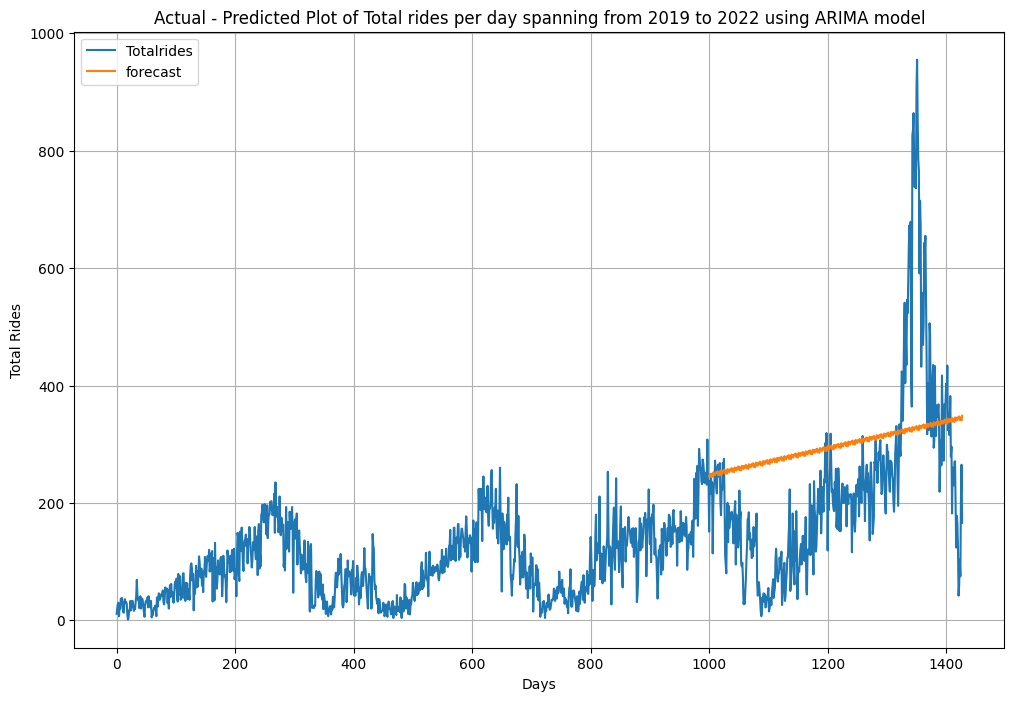

In [103]:
df_season_ARIMA = dataset_res_ARIMA[1].loc[:, ["Totalrides", "forecast"]]
df_season_ARIMA[['Totalrides','forecast']].plot(figsize=(12,8))
plt.xlabel("Days")
plt.ylabel("Total Rides")
plt.title("Actual - Predicted Plot of Total rides per day spanning from 2019 to 2022 using ARIMA model")
plt.legend()
plt.grid()
plt.show()

## LSTM

In [104]:
df_neu_pred=[]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

def season_demand_forecast_LSTM(rmse_train, rmse_test, season):
    print(season)
    df_neu_pred = df1.loc[df1['start station name'].isin(neu_stations)]
    df_neu_pred = df_neu_pred[df_neu_pred.season==season]
    
    df_neu_pred['date'] = df_neu_pred.starttime.dt.date
    df_neu_pred = df_neu_pred.groupby(['year','month','date']).size().reset_index(name = 'Totalrides')
    df_neu_pred['date'] = pd.to_datetime(df_neu_pred.date)
    #print(df_neu_pred.head())
    dataset = pd.DataFrame(df_neu_pred.Totalrides.values)
    dataset = dataset.astype('float32')
   
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
   
    train_size = int(len(dataset) * 0.80) #Splitting the dataset in train(80%) and test(20%)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
   
    look_back = 1 
    X_train, y_train = create_dataset(train, look_back)
    X_test, y_test = create_dataset(test, look_back)

    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back))) #LSTM model with 4 units. 
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=50, batch_size=1, verbose=2)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    y_train_pred = scaler.inverse_transform(y_train_pred)
    y_train = scaler.inverse_transform([y_train])
    y_test_pred = scaler.inverse_transform(y_test_pred)
    y_test = scaler.inverse_transform([y_test])
    
    rmse_train.append(math.sqrt(mean_squared_error(y_train[0], y_train_pred[:,0])))
    rmse_test.append(math.sqrt(mean_squared_error(y_test[0], y_test_pred[:,0])))
    
    
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()
    
    
    dataset = scaler.inverse_transform(dataset)
    return dataset, y_train_pred, y_test_pred, rmse_train, rmse_test




Winter


2022-12-12 04:00:27.535116: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-12 04:00:27.535150: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-12 04:00:27.535182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu-c-4-8gib-nyc1-01): /proc/driver/nvidia/version does not exist
2022-12-12 04:00:27.535432: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
260/260 - 2s - loss: 0.0414 - val_loss: 0.0581 - 2s/epoch - 9ms/step
Epoch 2/50
260/260 - 0s - loss: 0.0223 - val_loss: 0.0483 - 409ms/epoch - 2ms/step
Epoch 3/50
260/260 - 0s - loss: 0.0199 - val_loss: 0.0412 - 401ms/epoch - 2ms/step
Epoch 4/50
260/260 - 0s - loss: 0.0177 - val_loss: 0.0363 - 404ms/epoch - 2ms/step
Epoch 5/50
260/260 - 0s - loss: 0.0156 - val_loss: 0.0335 - 390ms/epoch - 1ms/step
Epoch 6/50
260/260 - 0s - loss: 0.0136 - val_loss: 0.0328 - 394ms/epoch - 2ms/step
Epoch 7/50
260/260 - 0s - loss: 0.0122 - val_loss: 0.0297 - 396ms/epoch - 2ms/step
Epoch 8/50
260/260 - 0s - loss: 0.0111 - val_loss: 0.0284 - 394ms/epoch - 2ms/step
Epoch 9/50
260/260 - 0s - loss: 0.0104 - val_loss: 0.0277 - 397ms/epoch - 2ms/step
Epoch 10/50
260/260 - 0s - loss: 0.0100 - val_loss: 0.0285 - 398ms/epoch - 2ms/step
Epoch 11/50
260/260 - 0s - loss: 0.0098 - val_loss: 0.0277 - 392ms/epoch - 2ms/step
Epoch 12/50
260/260 - 0s - loss: 0.0098 - val_loss: 0.0275 - 398ms/epoch - 2ms/step
Epoc

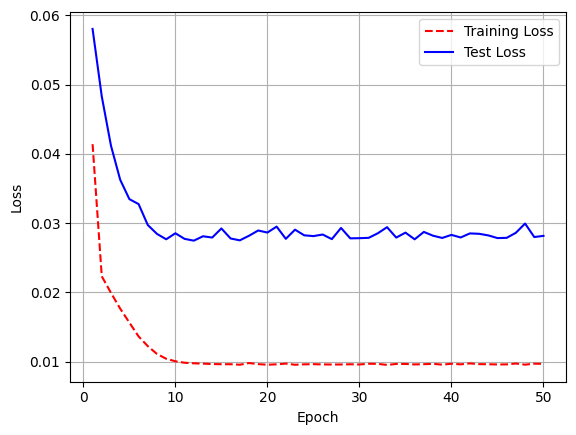

Spring
Epoch 1/50
292/292 - 2s - loss: 0.0311 - val_loss: 0.1606 - 2s/epoch - 7ms/step
Epoch 2/50
292/292 - 1s - loss: 0.0167 - val_loss: 0.1070 - 526ms/epoch - 2ms/step
Epoch 3/50
292/292 - 0s - loss: 0.0142 - val_loss: 0.0935 - 438ms/epoch - 1ms/step
Epoch 4/50
292/292 - 0s - loss: 0.0120 - val_loss: 0.0581 - 441ms/epoch - 2ms/step
Epoch 5/50
292/292 - 1s - loss: 0.0104 - val_loss: 0.0460 - 520ms/epoch - 2ms/step
Epoch 6/50
292/292 - 0s - loss: 0.0097 - val_loss: 0.0419 - 451ms/epoch - 2ms/step
Epoch 7/50
292/292 - 0s - loss: 0.0095 - val_loss: 0.0360 - 450ms/epoch - 2ms/step
Epoch 8/50
292/292 - 1s - loss: 0.0094 - val_loss: 0.0362 - 526ms/epoch - 2ms/step
Epoch 9/50
292/292 - 1s - loss: 0.0094 - val_loss: 0.0338 - 518ms/epoch - 2ms/step
Epoch 10/50
292/292 - 1s - loss: 0.0094 - val_loss: 0.0313 - 523ms/epoch - 2ms/step
Epoch 11/50
292/292 - 0s - loss: 0.0093 - val_loss: 0.0342 - 441ms/epoch - 2ms/step
Epoch 12/50
292/292 - 1s - loss: 0.0093 - val_loss: 0.0293 - 527ms/epoch - 2ms/st

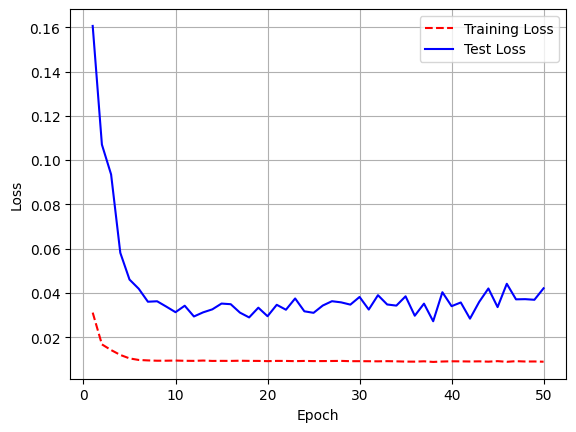

Summer
Epoch 1/50
292/292 - 2s - loss: 0.0093 - val_loss: 0.0878 - 2s/epoch - 7ms/step
Epoch 2/50
292/292 - 0s - loss: 0.0049 - val_loss: 0.0652 - 447ms/epoch - 2ms/step
Epoch 3/50
292/292 - 0s - loss: 0.0045 - val_loss: 0.0653 - 460ms/epoch - 2ms/step
Epoch 4/50
292/292 - 1s - loss: 0.0042 - val_loss: 0.0534 - 523ms/epoch - 2ms/step
Epoch 5/50
292/292 - 1s - loss: 0.0039 - val_loss: 0.0464 - 525ms/epoch - 2ms/step
Epoch 6/50
292/292 - 1s - loss: 0.0037 - val_loss: 0.0367 - 521ms/epoch - 2ms/step
Epoch 7/50
292/292 - 1s - loss: 0.0035 - val_loss: 0.0294 - 520ms/epoch - 2ms/step
Epoch 8/50
292/292 - 0s - loss: 0.0034 - val_loss: 0.0303 - 455ms/epoch - 2ms/step
Epoch 9/50
292/292 - 1s - loss: 0.0033 - val_loss: 0.0278 - 523ms/epoch - 2ms/step
Epoch 10/50
292/292 - 0s - loss: 0.0033 - val_loss: 0.0248 - 451ms/epoch - 2ms/step
Epoch 11/50
292/292 - 0s - loss: 0.0032 - val_loss: 0.0190 - 458ms/epoch - 2ms/step
Epoch 12/50
292/292 - 1s - loss: 0.0032 - val_loss: 0.0185 - 522ms/epoch - 2ms/st

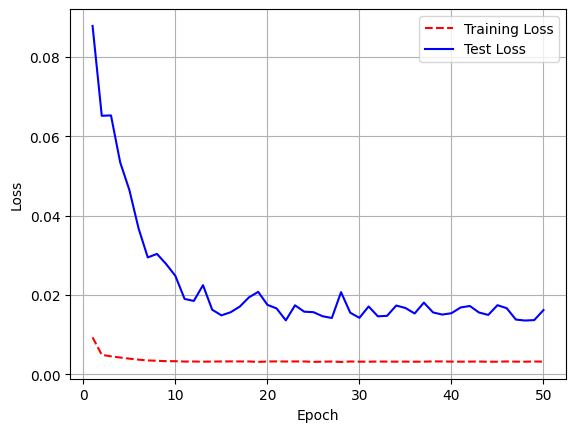

Fall
Epoch 1/50
289/289 - 2s - loss: 0.0244 - val_loss: 0.0302 - 2s/epoch - 7ms/step
Epoch 2/50
289/289 - 0s - loss: 0.0171 - val_loss: 0.0288 - 448ms/epoch - 2ms/step
Epoch 3/50
289/289 - 0s - loss: 0.0142 - val_loss: 0.0217 - 448ms/epoch - 2ms/step
Epoch 4/50
289/289 - 1s - loss: 0.0115 - val_loss: 0.0159 - 516ms/epoch - 2ms/step
Epoch 5/50
289/289 - 1s - loss: 0.0091 - val_loss: 0.0123 - 518ms/epoch - 2ms/step
Epoch 6/50
289/289 - 0s - loss: 0.0072 - val_loss: 0.0090 - 442ms/epoch - 2ms/step
Epoch 7/50
289/289 - 1s - loss: 0.0059 - val_loss: 0.0080 - 520ms/epoch - 2ms/step
Epoch 8/50
289/289 - 0s - loss: 0.0051 - val_loss: 0.0067 - 444ms/epoch - 2ms/step
Epoch 9/50
289/289 - 1s - loss: 0.0048 - val_loss: 0.0068 - 541ms/epoch - 2ms/step
Epoch 10/50
289/289 - 0s - loss: 0.0046 - val_loss: 0.0067 - 450ms/epoch - 2ms/step
Epoch 11/50
289/289 - 0s - loss: 0.0045 - val_loss: 0.0069 - 450ms/epoch - 2ms/step
Epoch 12/50
289/289 - 0s - loss: 0.0045 - val_loss: 0.0070 - 445ms/epoch - 2ms/step

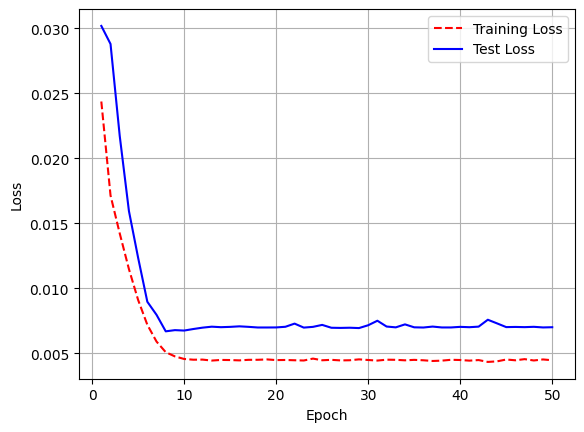

In [105]:
season_dict = {}
dataset_lst = []
y_train_pred_lst = []
y_test_pred_lst = []
rmse_train = []
rmse_test = []

for season in df1["season"].unique():
    dataset, y_train_pred, y_test_pred, rmse_train, rmse_test = season_demand_forecast_LSTM(rmse_train, rmse_test, season = season)
    dataset_lst.append(dataset)
    y_train_pred_lst.append(y_train_pred)
    y_test_pred_lst.append(y_test_pred)




In [106]:
print('Train Score: %.2f RMSE' % np.mean(rmse_train))
print('Test Score: %.2f RMSE' % np.mean(rmse_test))

Train Score: 35.95 RMSE
Test Score: 62.40 RMSE


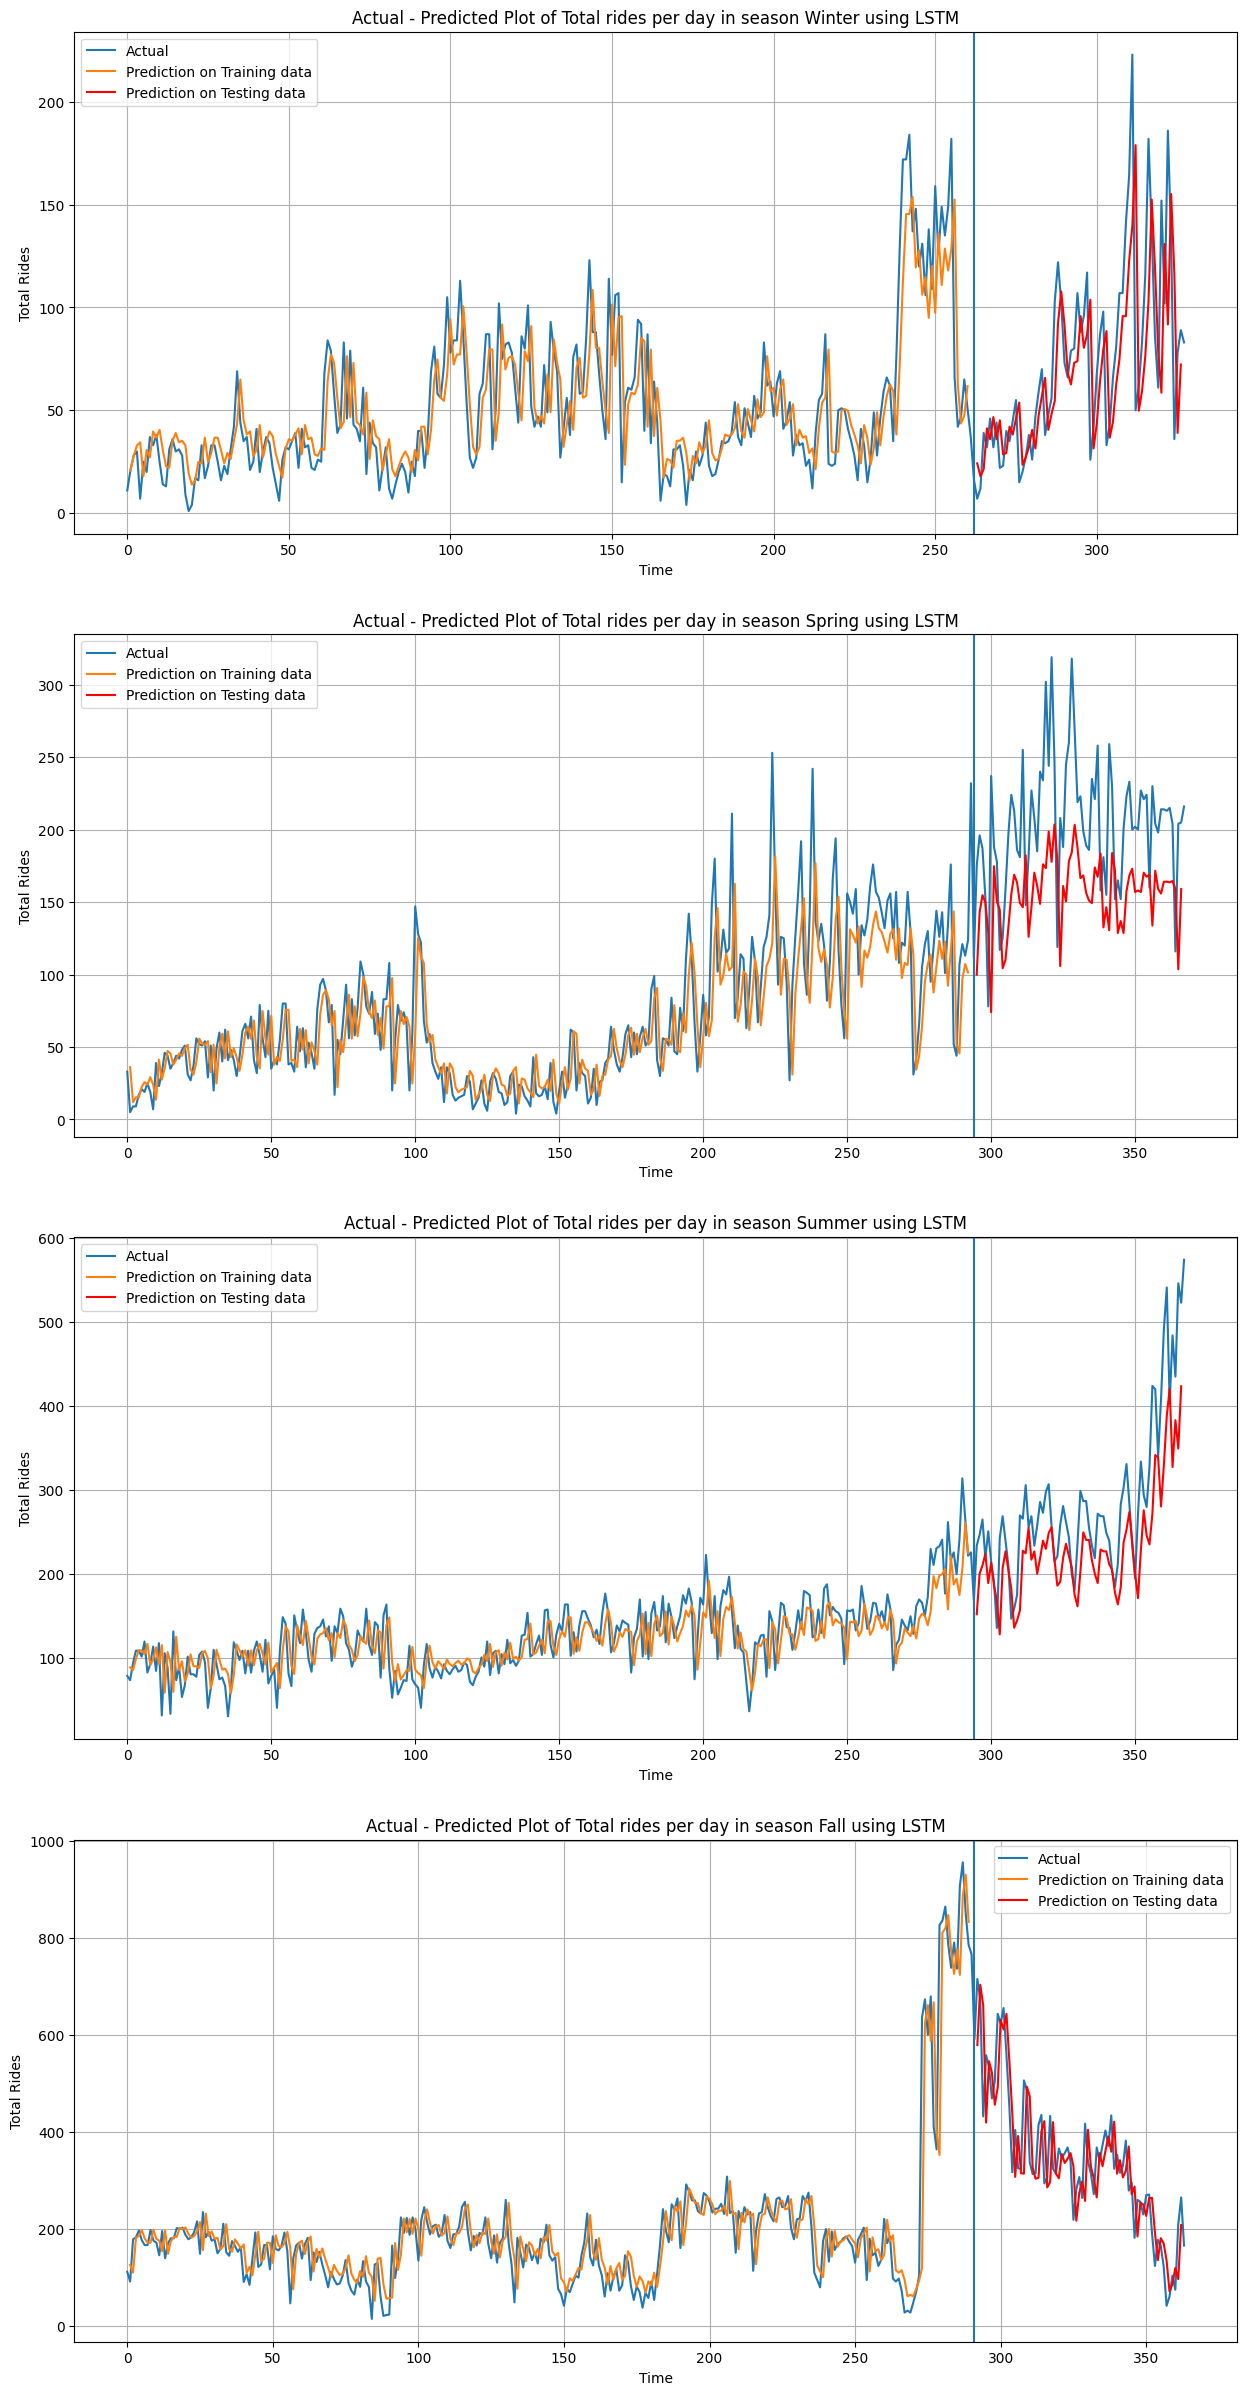

In [107]:
#Plotting the actual and predicted values
season_list = df1["season"].unique()
result = list(zip(season_list, dataset_lst, y_train_pred_lst, y_test_pred_lst))

fig, axs = plt.subplots(4, figsize = (15, 30)) 
for i in range(len(result)):
    
    look_back = 1
    
    season = result[i][0]
    dataset = result[i][1]
    trainPredict = result[i][2]
    testPredict = result[i][3]
    
    train_size = int(len(dataset) * 0.80)
    
    dataset_plot = dataset

    #print(dataset)
    y_train_pred_plot = np.empty_like(dataset)
    y_train_pred_plot[:, :] = np.nan
    y_train_pred_plot[look_back: len(trainPredict) + look_back, :] = trainPredict
    # shift test predictions for plotting
    
    y_test_pred_plot = np.empty_like(dataset)
    y_test_pred_plot[:, :] = np.nan
    y_test_pred_plot[len(trainPredict) + (look_back * 2) + 1 : len(dataset) - 1, :] = testPredict
    
    dataset_lst = []
    y_train_lst = []
    y_test_lst = []
    dataset_lst.append(dataset)
    y_train_lst.append(y_train_pred_plot)
    y_test_lst.append(y_test_pred_plot)
    
    #print(y_train_lst)
    axs[i].plot(dataset_plot, label = "Actual")
    axs[i].plot(y_train_pred_plot, label = "Prediction on Training data")
    axs[i].plot(y_test_pred_plot, label = "Prediction on Testing data", color = "red")
    axs[i].axvline(x = train_size)
    axs[i].set_title("Actual - Predicted Plot of Total rides per day in season {} using LSTM".format(season))
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Total Rides')
    axs[i].legend()
    axs[i].grid()
    fig.savefig("saved_images.jpg")


   
   
    